<a href="https://colab.research.google.com/github/sherlockieee/cs113/blob/main/CS114_Problem_set_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION 1


In [28]:
import urllib.request
from collections import defaultdict
import numpy as np
# Load the image data from sympy.org
url = 'https://www.sympy.org/static/images/logo.png'
print('Loading image data from:', url)

with urllib.request.urlopen(url) as fp:
    image_data = fp.read()

# Convert the image data into an array of bits (0s and 1s)
bits = []
for byte in image_data: # Each byte of data contains 8 bits (0s and 1s)
    bits.extend(int(_) for _ in bin(256 + byte)[3:])
bits = np.array(bits)

# Count the 0s and 1s
print()
print(f'Number of bits (total): {len(bits):6}')
print(f'Number of 0s: {np.sum(bits == 0):6}')
print(f'Number of 1s: {np.sum(bits == 1):6}')

# Count the runs and their lengths
runs_total = 0
runs_of_length = defaultdict(int)
run_start_index = 0
for index in range(1, len(bits)):
    if bits[index] != bits[run_start_index]:
        # End of this run
        run_length = index - run_start_index
        runs_total += 1
        runs_of_length[run_length] += 1
        # Start the next run
        run_start_index = index
        
# Count the final run
run_length = len(bits) - run_start_index
runs_total += 1
runs_of_length[run_length] += 1
print()
print(f'Number of runs (any length): {runs_total:6}')
print(f'Runs of length 1: {runs_of_length[1]:6}')
print(f'Runs of length 2: {runs_of_length[2]:6}')
print(f'Runs of length 3: {runs_of_length[3]:6}')

Loading image data from: https://www.sympy.org/static/images/logo.png

Number of bits (total): 225672
Number of 0s: 112392
Number of 1s: 113280

Number of runs (any length): 113198
Runs of length 1:  56241
Runs of length 2:  28831
Runs of length 3:  14438


1. Determine the expected number of 0s and 1s in a sequence of n random bits (not the image file above).


Expected number of 0s = Expected number of 1s = n//2

2. 
A run is defined as a sequence of consecutive 0s or 1s. For example, this bit sequence contains 5 runs.

1 1 0 0 1 1 1 0 0 1

There are 3 runs of length 2, 1 run of length 1, and 1 run of length 3 as indicated below.

runs   | 1 1 | 0 0 | 1 1 1 | 0 0 | 1 |

lengths 2 2 3 2 1

Determine the expected value of the number of runs (of any length) in a sequence of n
random bits.


In [29]:
"""
Using R.I.V:
Let I_j be the Random indicator variable such that:
I_j = 1 if jth value is the start of a new run, otherwise I_j = 0.
j ranges from 1 to n. 
=> Expected value = Sum of I_j 

We have I_1 = 1 (the first value is definitely the start of a new run)
For j = 2 to j = n 
Start of new run = having the opposite value from previous value 
=> If the previous value is 1 -> 1/2 probability of getting 0
=> If previous value is 0 => 1/2 probability of getting 1
=> I_j = 1/2 * 1/2 * 2 = 1/2

"""
from sympy import Sum
from sympy.abc import n
expected_value_no_of_runs = 1 + 1/2 * (n - 1)
print(expected_value_no_of_runs)

0.5*n + 0.5


3. Determine the expected value of the number of runs of length exactly k in a sequence
of n random bits.



In [30]:
"""
Using R.I.V:
Let I_j be the Random indicator variable such that:
I_j = 1 if jth value is the start of a new run, , otherwise I_j = 0.
j ranges from 1 to n. 
=> Expected value = Sum of I_j 

We have I_j = (1/2)**k 
Start of new run with length of exactly k 

For j = 2 to j = n
If the previous value is 1 
-> (1/2)**k probability of getting 0 k times, and 1/2 probability that the (k+1)th time is 1
If previous value is 0 
=> (1/2)**k probability of getting 1 k times, and 1/2 probability that the (k+1)th time is 0
=> I_j = 2 * (1/2) * (1/2) ** k * 1/2 = (1/2) ** (k + 1)

For j = 1 => We don't need to consider previous value
=> Probability = (1/2) ** k  

"""
from sympy import Sum
from sympy.abc import n, k
expected_value_no_of_runs_k = (n - 1) * (1/2)**(k + 1) + (1/2) ** k
print(expected_value_no_of_runs_k)

0.5**k + 0.5**(k + 1)*(n - 1)


4. Compare your results from (1.), (2.), and (3.) to the counts we got for the file above. Do
you think the file is optimally compressed? Explain your answer."

In [31]:
"""
Null hypothesis = it is optimally compressed i.e. it behaves like a random bit sequence
We establish this by running multiple trials and see if the value we get is within
the 95% confidence interval of an optimally compressed file
"""
import random
from collections import defaultdict

trials = 100
no_of_bits = 225672
zeroes_lst = []
ones_lst = []
runs_lst = []
runs_1_lst = []
runs_2_lst = []
runs_3_lst = []

for _ in range(trials):
    bits = [random.randint(0, 1) for _ in range(no_of_bits)]
    no_of_ones = sum(bits)
    no_of_zeros = no_of_bits - no_of_ones
    zeroes_lst.append(no_of_zeros)
    ones_lst.append(no_of_ones)


    # Count the runs and their lengths
    runs_total = 0
    runs_of_length = defaultdict(int)
    run_start_index = 0
    for index in range(1, len(bits)):
        if bits[index] != bits[run_start_index]:
            # End of this run
            run_length = index - run_start_index
            runs_total += 1
            runs_of_length[run_length] += 1
            # Start the next run
            run_start_index = index
            
    # Count the final run
    run_length = len(bits) - run_start_index
    runs_total += 1
    runs_of_length[run_length] += 1

    runs_lst.append(runs_total)
    runs_1_lst.append(runs_of_length[1])
    runs_2_lst.append(runs_of_length[2])
    runs_3_lst.append(runs_of_length[3])



In [32]:
import numpy as np, scipy.stats as st

zeroes_cf = st.t.interval(0.95, len(zeroes_lst)-1, loc=np.mean(zeroes_lst), scale=st.sem(zeroes_lst))
print("Confidence interval of number of zeroes", zeroes_cf)
print("Empirical value =", no_of_bits//2)
print("Value we get = 112392")
print()
ones_cf = st.t.interval(0.95, len(ones_lst)-1, loc=np.mean(ones_lst), scale=st.sem(ones_lst))
print("Confidence interval of number of ones", ones_cf)
print("Empirical value =", no_of_bits//2)
print("Value we get = 113280")
print()
runs_cf = st.t.interval(0.95, len(runs_lst)-1, loc=np.mean(runs_lst), scale=st.sem(runs_lst))
print("Confidence interval of number of runs", runs_cf)
print("Empirical value =", expected_value_no_of_runs.subs({n: no_of_bits}))
print("Value we get = 113198")
print()

runs_1_cf = st.t.interval(0.95, len(runs_1_lst)-1, loc=np.mean(runs_1_lst), scale=st.sem(runs_1_lst))
print("Confidence interval of number of runs of length 1", runs_1_cf)
print("Empirical value =", expected_value_no_of_runs_k.subs({n: no_of_bits, k:1}))
print("Value we get = 56241")
print()

runs_2_cf = st.t.interval(0.95, len(runs_2_lst)-1, loc=np.mean(runs_2_lst), scale=st.sem(runs_2_lst))
print("Confidence interval of number of runs of length 2", runs_2_cf)
print("Empirical value =", expected_value_no_of_runs_k.subs({n: no_of_bits, k:2}))
print("Value we get = 28831")
print()
runs_3_cf = st.t.interval(0.95, len(runs_3_lst)-1, loc=np.mean(runs_3_lst), scale=st.sem(runs_3_lst))
print("Confidence interval of number of runs of length 3", runs_3_cf)
print("Empirical value =", expected_value_no_of_runs_k.subs({n: no_of_bits, k:3}))
print("Value we get = 14438")


Confidence interval of number of zeroes (112744.95327450075, 112844.84672549924)
Empirical value = 112836
Value we get = 112392

Confidence interval of number of ones (112827.15327450076, 112927.04672549925)
Empirical value = 112836
Value we get = 113280

Confidence interval of number of runs (112786.4509459582, 112876.24905404181)
Empirical value = 112836.500000000
Value we get = 113198

Confidence interval of number of runs of length 1 (56369.45805484503, 56473.68194515497)
Empirical value = 56418.2500000000
Value we get = 56241

Confidence interval of number of runs of length 2 (28166.886128726703, 28222.173871273295)
Empirical value = 28209.1250000000
Value we get = 28831

Confidence interval of number of runs of length 3 (14088.200703842058, 14129.419296157941)
Empirical value = 14104.5625000000
Value we get = 14438


The above calculation is used both to check the calculation in part a and b, and the values we get from the Python compression file. None of the values we get from the Python compression file is in the confidence interval range for a truly random bit of string, so based on this, we can say that the bits is, from a strictly statistical perspective, not fully random, and thus not fully optimised. 

However, we can also see that while it is outside of the confidence interval value, it is not that far away from the empirical value in order of magnitude (considering we have 10^5-10^6 bits but it is only off by a factor of 10^2). So it is actually pretty close to random bits. Thus from a practical standpoint, it is close to being optimally compressed. 

#Question 2

A book has $n$ typos. Two proofreaders, Sho and Haruna, independently read the book. Sho
finds each typo independently with probability $p1$, and Haruna with probability $p2$. Let $X_1$ be
the number of typos caught by Sho, $X_2$ be the number caught by Haruna, and $X$ be the
number caught by at least one of the two proofreaders.
1. Find the distribution of $X$. Motivate your answer.



In [33]:
"""
This is a binomial distribution because it satisfies:
- Fixed number of observations (n typos)
- Each observation falls into either success or failure (caught or not caught)
- Observations are independent - both proofreaders independently read the book and
finds each typo independently
- probability of success p is the same
p = 1 - (1-p1)(1-p2) = 1 - 1 + p1 + p2 - p1p2 = p1 + p2 - p1p2
"""

from sympy import binomial, Symbol
from sympy.abc import n, k

p1, p2 = Symbol("p1"), Symbol("p2")
X = binomial(n, k) * (p1 + p2 - p1*p2) ** k * (1 - (p1 + p2 - p1*p2)) ** (n - k)


In [43]:
'''
Simulation to test the results
'''
import random
import matplotlib.pyplot as plt

P1 = 0.7
P2 = 0.65
N = 500
trials = 10000
K_vals = []

for _ in range(trials):
    found = [0] * N
    for i in range(N):
        #if either Shou or Haruna found it
        if random.random() < P1:
            found[i] = 1
        if random.random() < P2:
            found[i] = 1
    #sum(found) is rvs of X
    K_vals.append(sum(found))



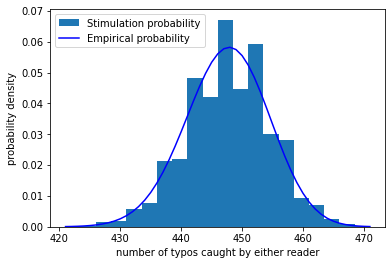

In [51]:
plt.hist(K_vals, density=True, bins = 20, label="Stimulation probability")

#empirical value
pdf = []
all_ks = [i for i in range(min(K_vals), max(K_vals) + 1)]

for K in range(min(K_vals), max(K_vals) + 1):
    pdf.append(X.subs({n: N, k: K, p1: P1, p2: P2}))

plt.plot(all_ks, pdf, color = 'b', label="Empirical probability")
plt.xlabel("number of typos caught by either reader")
plt.ylabel("probability density")
plt.legend()
plt.show()




2. Assuming $p1=p2$, find the conditional distribution of $X_1$ given that $X_1+X_2=t$.
That is, if we know $t$ typos were found, how many were found by the first proofreader?

Hint: $X_1+X_2\neq X$. Note that we are conditioning on the number of typos found by
Sho plus the number found by Haruna. This is not the same as the number of typos
found by at least one of the two proofreaders — we are double-counting the typos
found by both of them.

In [36]:
"""
P(X1 = x | X1 + X2 = t) = P(X1 = x & X1 + X2 = t) / P(X1 + X2 = t)

P(X1 + X2 = t) = Probability we find t typos in total 
= t successes in 2*n trials (because Shou reads it once and Haruna reads it once)
P(X1 + X2 = t) = 2nCt * p1**t * (1 - p1) ** (2n - t)

P(X1 = x & X1 + X2 = t) = Probability we find t typos in total, and Shou finds x typos 
i.e. Probability Shou finds x typos, and Haruna finds t - x typos
= nCx * (p1)**x * (1-p1)**(n - x) * nC(t-x) * p1**(t-x) * (1-p1)**(n - t + x)
"""
from sympy import binomial, Symbol
from sympy.abc import n, k, t

numerator = binomial(n, k) * p1**k * (1 - p1)**(n-k) * binomial(n, t - k) * p1**(t-k) * (1-p1)**(n-t+k)
denominator = binomial(2*n, t) * p1**t * (1-p1)**(2*n - t)
ans = numerator/denominator


In [37]:
"""
Simulation to check our answer
"""
import random

trials = 10000
P1 = P2 = 0.8
N = 100
T = 160
K = 80

found_t_errors = 0
shou_found_k_errors = 0
for _ in range(trials):
    shou = 0
    for _ in range(N):
        if random.random() < P1:
            #shou found a typo
            shou += 1

    haruna = 0 
    for _ in range(N):
        if random.random() < P2:
            #haruna found a typo
            haruna += 1
    
    #given that X1 + X2 = t
    if shou + haruna == T:
        found_t_errors += 1
        #count time where t = k
        if shou == K:
            shou_found_k_errors += 1

print("Stimulated probability =", shou_found_k_errors/ found_t_errors)
print("Empirical probability =", ans.subs({n:N, t:T, k:K, p1:P1,p2:P2}))

Stimulated probability = 0.13199426111908177
Empirical probability = 0.140124894775049


3. You write a book with 100,000 words. On average, you make a typo once every 300
words. Sho and Haruna proofread your book. Sho finds 297 typos while Haruna finds
312 typos. Use model selection to decide whether Haruna is better than Sho at finding
typos or whether it is just a coincidence that she found more than Sho this time.

Hints:
- Follow the frequentist model selection recipe from the Session 12 Study Guide.
- For the null model, think carefully about which distribution to use for the number
of typos that exist in the book.
- You’ll need your answer to part (2.) above.
- You will need to implement a simulation for this problem. Don’t rely on looking up
a known distribution of the test statistic.

In [38]:
"""
For number of typos that exist in the book
=> Poisson distribution is most appropriate, because it fits all the requirements:
- All events are independent (typos are made independently)
- The average rate of event is 1/300 words, so for the book it is 100,000/300
- Two events cannot occur at the same time (cannot have two typos for the same word)

However, we know that Haruna found 312 typos. Assuming there is no false positive, 
the lower bound for Poisson distribution is 312.

The strategy for this is:
1. Sample from a Poisson distribution with mean of (100,000/300) until we get
a value > 312. This is our number of typos.
2. We already know t = 312 + 297, if p1 = p2 then we can get p = t/ 2 * (number of typo)
3. Use answer in part 2 to find the probability that Shou found 297 errors. 
This is our p-value for the null hypothesis that p1 = p2.
4. Run multiple trials of 1-3 and average out the probability.
"""
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
import scipy.stats as st


trials = 1000
mu = 100000/300
distribution = poisson(mu)
total_typos_found = 312 + 297
shou_typos_found = 297

probability = ans

p_vals = []

for _ in range(trials):
    no_of_typos = distribution.rvs()
    while no_of_typos < 312:
        no_of_typos = distribution.rvs()
    assumed_probability = total_typos_found / (2 * no_of_typos)
    p_val = float(ans.subs({n:no_of_typos, t:total_typos_found, k:shou_typos_found, 
                      p1:assumed_probability,p2:assumed_probability}))
    if np.isnan(p_val):
        print(no_of_typos, assumed_probability)
    p_vals.append(p_val)




In [39]:
#finding the confidence interval for p_val
cf = st.t.interval(0.95, len(p_vals)-1, loc=np.mean(p_vals), scale=st.sem(p_vals))
print("Confidence interval for p-val", cf)
print("Mean estimate for p-val", np.mean(p_vals))

Confidence interval for p-val (0.013572546362367245, 0.014578027360243398)
Mean estimate for p-val 0.014075286861305322


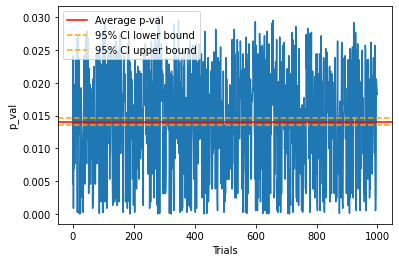

In [52]:
plt.plot(p_vals)
plt.axhline(y = np.mean(p_vals), color = 'r', linestyle = '-', label="Average p-val")
plt.axhline(y=cf[0], color = 'orange', linestyle='--', label="95% CI lower bound")
plt.axhline(y=cf[1], color = 'orange', linestyle='--', label="95% CI upper bound")
plt.xlabel("Trials")
plt.ylabel("p_val")
plt.legend()
plt.show()

Based on the stimulation, we get the mean p-val to be 0.014, which means that our null hypothesis, p1 = p2, i.e. Shou and Haruna finds the same number of typos, is rejected (as p < 0.05). I further calculated the confidence interval and it is in the range of (0.0135, 0.0145) so we can have confidence that Haruna is better at finding typos than Shou and this difference is statistically significant.